# Submitted By : Rohit 

## (17001011046)

In [1]:
# Importing lib 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

In [2]:
#preprocessing
scaler = MinMaxScaler(feature_range=(0, 1))

# Linear Regression

In [3]:
# loading input data
data = pd.read_csv('~/Desktop/NSE-TATAGLOBAL11.csv')
data['Date'] = pd.to_datetime(data.Date,format='%Y-%m-%d')
data.index = data['Date']


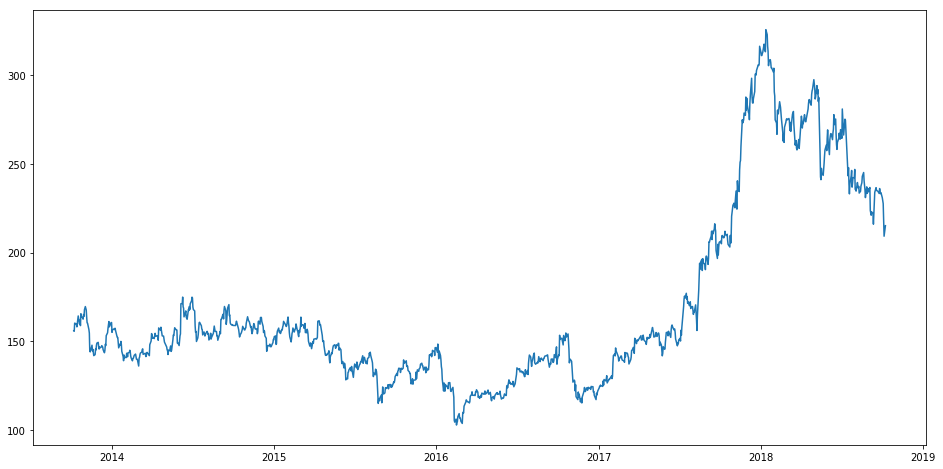

In [4]:
# plot graph
plt.figure(figsize=(16,8))
plt.plot(data['Close'], label='Close Price history')


In [5]:
# Convert to data with just date and closing price

data = data.sort_index(ascending=True, axis=0)
new_data = pd.DataFrame(index=range(0,len(data)), columns=['Date', 'Close']) #Initialise new dataframe

for i in range(0,len(data)):
    new_data['Date'][i] = data['Date'][i]
    new_data['Close'][i] = data['Close'][i]


In [6]:
#feature independents for linear regression
for i in range(0,len(new_data)):
    new_data['Year'] = str(new_data['Date'][0])[0:4]
    new_data['Month'] = str(new_data['Date'][0])[6:7]
    new_data['mon_fri'] = 0

In [7]:
new_data.drop("Date",axis=1,inplace=True)

In [8]:
new_data.head()

,Close,Year,Month,mon_fri
0,155.8,2013,0,0
1,155.55,2013,0,0
2,160.15,2013,0,0
3,160.05,2013,0,0
4,159.45,2013,0,0


In [9]:
# dividing data in train and test
train = new_data[:900]  # 900 for test
test = new_data[900:]

x_train = train.drop('Close', axis=1)
y_train = train['Close']
x_test = test.drop('Close', axis=1)
y_test = test['Close']

In [10]:
# Use Linear Regression
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(x_train,y_train)
preds = model.predict(x_test) 

In [11]:
#rms value
rms=np.sqrt(np.mean(np.power((np.array(y_test)-np.array(preds)),2)))
print(rms)

108.9816944440294


In [12]:
#standard deviation
preds.std()

0.0

C:\Users\Rohit Sehwag\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\Rohit Sehwag\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


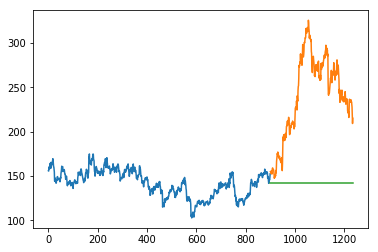

In [13]:
#Plotting predected vs Actual
test['Predictions'] = 0
test['Predictions'] = preds

test.index = new_data[900:].index
train.index = new_data[:900].index

plt.plot(train['Close'])
plt.plot(test[['Close', 'Predictions']])

#Yellow - Actual
#Green - Predicted

# Average Method

In [14]:
data = data.sort_index(ascending=True, axis=0)
new_data = pd.DataFrame(index=range(0,len(data)),columns=['Date', 'Close'])

In [15]:
for i in range(0,len(data)):
     new_data['Date'][i] = data['Date'][i]
     new_data['Close'][i] = data['Close'][i]

In [16]:
#splitting into train and validation
train = new_data[:900]
valid = new_data[900:]

In [17]:
new_data.shape, train.shape, valid.shape

((1235, 2), (900, 2), (335, 2))

In [18]:
train['Date'].min(), train['Date'].max(), valid['Date'].min(), valid['Date'].max()


(Timestamp('2013-10-08 00:00:00'),
 Timestamp('2017-06-01 00:00:00'),
 Timestamp('2017-06-02 00:00:00'),
 Timestamp('2018-10-08 00:00:00'))

In [19]:
preds = []
for i in range(0,335):
    a = train['Close'][len(train)-248+i:].sum() + sum(preds)
    b = a/248
    preds.append(b)

C:\Users\Rohit Sehwag\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\Rohit Sehwag\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


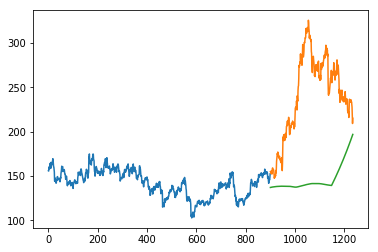

In [20]:
# actual vs pred
valid['Predictions'] = 0
valid['Predictions'] = preds
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])

In [21]:
#rms value
rms=np.sqrt(np.mean(np.power((np.array(valid['Close'])-preds),2)))
rms

105.88066726820159

# Result and conclusion

RMS Error with Linear Regression is 108.9816 <br>
RMS Error with Average Method is 105.8806

## Conclusion

RMSE is greater when Linear Regression is used for predection. However the RSME in case of average method is also not very good, reason being availibility of low training data. Secondly better predection models can be used like LSTMs for better result models which learn with time. As the behaviour of stocks is never linear hence Linear regression is a poor choice of model.
Hence it can be concluded that in presence of sufficient training data and better time series models, the machine can perform better.
